#### <u>Apply ESN to CESM </u>

**Tech Preamble**

In [1]:
import glob
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import warnings
warnings.filterwarnings("ignore")

**Step 1 - Select Area**

load one Dataset and find indices

In [2]:
original_file_path = "/data/ocean/CESM_output/GCS_2015_2017/ctrl_ocn/ctrl.g.e11.G.T62_t12.002.pop.h.0022-08.nc"
original_ds = xr.open_dataset(original_file_path)

In [51]:
# Define the bounds for the Kuroshio region
lat_min, lat_max = 25, 40
lon_min, lon_max = 125, 150  # CESM uses 0-360° longitude convention

# Extract latitudes and longitudes
lat = original_ds['TLAT']
lon = original_ds['TLONG']

# Find the indices for the Kuroshio Current region (same for all datasets)
lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[1]

# Print the minimum and maximum of the indices
print(f"Latitude indices min: {lat_indices.min()}, max: {lat_indices.max()}")
print(f"Longitude indices min: {lon_indices.min()}, max: {lon_indices.max()}")


Latitude indices min: 1440, max: 1649
Longitude indices min: 2350, max: 2699


**Step 2 - Switch to TERMINAL and use nco to chunk data**

2.1 Do it for one dataset and check

**Example: Kuro**

<br>

_Create the output directory_

mkdir -p /data/Hannah/Kuro

<br>

_Run the ncks command with the specified latitude and longitude ranges_


ncks -4 -O \
  -d nlat,1440,1649 -d nlon,2350,2699 \
  --cnk_dmn nlat,50 --cnk_dmn nlon,50 \
  /data/ocean/CESM_output/GCS_2015_2017/ctrl_ocn/ctrl.g.e11.G.T62_t12.002.pop.h.0022-08.nc \
  /data/Hannah/Kuro/ctrl_chunked_v2.nc


In [57]:
file_path = "/data/Hannah/Kuro/ctrl_chunked_v2.nc"
chunked_ds = xr.open_dataset(file_path)

ssh = chunked_ds['SSH']

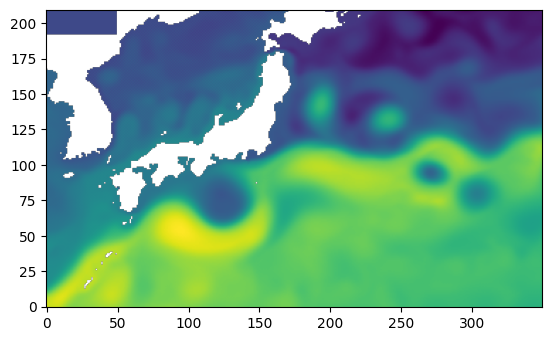

In [58]:
plt.imshow(ssh.isel(time = 0), origin = "lower")
plt.show()

2.2 Repeat for all datasets

modify and run bash script "./chunk_all_files.sh"